# Test run pipeline
Starting from calints run entire pipeline and preview results plots

In [1]:
from erebus.utility.h5_serializable_file import H5Serializable
import erebus.utility.utils as utils 
from uncertainties import ufloat
from erebus.photometry_data import PhotometryData
from erebus.utility.run_cfg import ErebusRunConfig
from erebus.erebus import Erebus
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lhs1478b = ErebusRunConfig.load("./lhs1478b_run.yaml")

In [3]:
erebus = Erebus(lhs1478b, force_clear_cache=True)

Loading data from calints in /mnt/c/Users/nicho/Research/GitHub/erebus/manual_tests/./mast_lhs1478b
Loading 5 segments


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.81s/it]


Sorting data
Found star at: 127, 127
Rejecting NaNs and outliers


100%|████████████████████████████████████████████████████████████████████████████████| 127/127 [00:00<00:00, 130.93it/s]


Interpolating bad pixels


100%|█████████████████████████████████████████████████████████████████████████████████| 964/964 [02:43<00:00,  5.88it/s]


50 pixels were bad out of 16129
351 values were interpolated out of 15548356
1656 values were outliers out of 15548356
Loading data from calints in /mnt/c/Users/nicho/Research/GitHub/erebus/manual_tests/./mast_lhs1478b
Loading 5 segments


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.70s/it]


Sorting data
Found star at: 127, 128
Rejecting NaNs and outliers


100%|████████████████████████████████████████████████████████████████████████████████| 127/127 [00:01<00:00, 125.75it/s]


Interpolating bad pixels


100%|█████████████████████████████████████████████████████████████████████████████████| 964/964 [02:39<00:00,  6.06it/s]


50 pixels were bad out of 16129
409 values were interpolated out of 15548356
1420 values were outliers out of 15548356
60329.22548765673 58786.2543+/-0.0004
790.9548964664856
Visit jw03730012001 wasn't run yet
60266.83961825303 58786.2543+/-0.0004
758.9545580253923
Visit jw03730013001 wasn't run yet
Circular orbit: using gaussian prior for t_sec_offset
Joint fit wasn't run yet


### Plotting initial guess

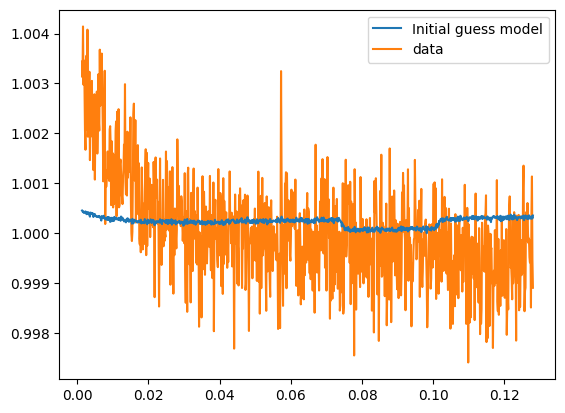

In [4]:
fit = erebus.individual_fits[0]
mcmc = fit.mcmc
initial_guess = np.array([mcmc.params[p].value for p in mcmc.params])[:-1]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *initial_guess)

plt.plot(t, f_model, label='Initial guess model', zorder=3)
plt.plot(t, f, label='data')
plt.legend()
plt.show()

In [5]:
erebus.run(output_folder="./test_output/", force_clear_cache=True)

No currently saved data
Initial guesses: [0.08793104349984282, 0.0002, 58786.25425000023, 0.0462, 16.119, 1.9495378, 87.452, 0.1, 0.1, 0.1, 0.1, 0.1, 0.001, 1e-06, 0.0004] variation: [0.0016349998613904247, 0.000325, 0.00021, 0.00055, 0.047, 2.05e-06, 0.026, 2.475, 2.475, 2.475, 2.475, 2.475, 0.49975, 0.0024997500000000002, 0.0001]
Initial likelihood: 3124.8668629263266
Fitting for 15 parameters


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:32<00:00, 10.86it/s]


Moved away from starting positions for chain # 0


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:32<00:00, 10.84it/s]


Moved away from starting positions for chain # 1
Initial guesses shape: (2, 64, 15)
Mean likelihood at start: 5214.105201754082
Processing chain #0
Processing chain #1


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [16:05<00:00, 10.36it/s]


Rubin gelman convergence: [0.99999922 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922
 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922
 0.99999922 0.99999922 0.99999922] converged? True
Autocorr time: 172.5187920826311 converged? True
Iterations: 0 Max steps: 200000
Continue looping? False
Autocorr time: 172.5187920826311
{'t_sec': 0.08884817713925505+/-0.0021928387574895944, 'fp': -0.0001337406158848445+/-7.443770810221042e-05, 't0': 58786.25424207234+/-0.00041117100045084953, 'rp_rstar': 0.046244506001093685+/-0.001106791515831148, 'a_rstar': 16.113635618066404+/-0.09364740841392916, 'p': 1.9495377492843282+/-4.1144925301273005e-06, 'inc': 87.45469408026287+/-0.05232372273711405, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1': 1.1520407046033758+/-0.12434675354602898, 'pc2': 1.095026404541239+/-0.09559750394676736, 'pc3': 0.05062672529034937+/-0.20678740755319303, 'pc4': 0.13162275343539945+/-0.18883278343469115, 'pc5': -0.1562135578511378+/-0.21958970956603294, 'exp1':

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:28<00:00, 11.28it/s]


Moved away from starting positions for chain # 0

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:28<00:00, 12.59it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:28<00:00, 11.27it/s]


Moved away from starting positions for chain # 1
Initial guesses shape: (2, 64, 15)
Mean likelihood at start: 5263.0728370873085
Processing chain #0
Processing chain #1


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [14:39<00:00, 11.37it/s]


Rubin gelman convergence: [0.99999922 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922
 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922
 0.99999922 0.99999922 0.99999922] converged? True
Autocorr time: 168.51299415182854 converged? True
Iterations: 0 Max steps: 200000
Continue looping? False
Autocorr time: 168.51299415182854
{'t_sec': 0.0885456577099589+/-0.0020692235769773637, 'fp': 0.000164945632859028+/-7.089376792970668e-05, 't0': 58786.254271817175+/-0.0004191699918010272, 'rp_rstar': 0.04618143650392678+/-0.001100761938572812, 'a_rstar': 16.12690692758091+/-0.09412845493683974, 'p': 1.9495378143723476+/-4.03756440314762e-06, 'inc': 87.44473497301317+/-0.051714673324745775, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1': 0.04211735279344704+/-0.046924506002554, 'pc2': -0.15418421430287665+/-0.10169620809139046, 'pc3': 0.20478296654015415+/-0.21107661398751038, 'pc4': -0.22711894439415398+/-0.18405148128906607, 'pc5': -0.3624998845076475+/-0.21051761289130816, 'exp1': 

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:14<00:00,  7.41it/s]


Moved away from starting positions for chain # 0


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:15<00:00,  7.40it/s]


Moved away from starting positions for chain # 1
Initial guesses shape: (2, 80, 17)
Mean likelihood at start: 2919.8004075607437
Processing chain #0
Processing chain #1


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [22:50<00:00,  7.30it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [187.92101508 210.5605753  189.85885684 193.66128658 198.61148945
 189.67485943 209.00452249 203.53691557 198.02141162 190.35583989
 202.83043258 193.05399388 185.14947004 195.65388363 207.23992575
 215.89765266 216.00382159]
Rubin gelman convergence: [0.99999937 0.99999937 0.99999937 0.99999937 0.99999937 0.99999937
 0.99999937 0.99999937 0.99999937 0.99999937 0.99999937 0.99999937
 0.99999937 0.99999937 0.99999937 0.99999937 0.99999937] converged? True
Autocorr time: inf converged? False
Iterations: 0 Max steps: 200000
Continue looping? True
Processing chain #0
Processing chain #1


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [23:10<00:00,  7.19it/s]


Rubin gelman convergence: [0.99999969 0.99999969 0.99999969 0.99999969 0.99999969 0.99999969
 0.99999969 0.99999969 0.99999969 0.99999969 0.99999969 0.99999969
 0.99999969 0.99999969 0.99999969 0.99999969 0.99999969] converged? True
Autocorr time: 220.63518959542427 converged? True
Iterations: 10000 Max steps: 200000
Continue looping? False
Autocorr time: 220.63518959542427
{'t_sec_offset': 3.225091411573368e-05+/-0.0032347210214524373, 'fp': -2.2887911202699994e-06+/-5.3445523792443705e-05, 'rp_rstar': 0.0462+/-0, 'a_rstar': 16.119+/-0, 'p': 1.9495378+/-0, 'inc': 87.452+/-0, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1_0': -0.042341333951315764+/-0.14705795141859151, 'pc2_0': -0.10922328942958857+/-0.1124065658282617, 'pc3_0': 0.34789359396966657+/-0.3112071716504034, 'pc4_0': -0.27407917865351755+/-0.40325367903334, 'pc5_0': -0.5632402408336872+/-0.35609283613260345, 'exp1_0': 0.0+/-0, 'exp2_0': 0.0+/-0, 'a_0': -0.007453410864518626+/-0.0014747102520587699, 'b_0': 0.0004796584930389756+/-0.000

In [6]:
from erebus.joint_fit_results import JointFitResults
res = JointFitResults(erebus.joint_fit)
len(res.model_time_per_visit[0])
len(res.model_flux_per_visit[0])

1000

2


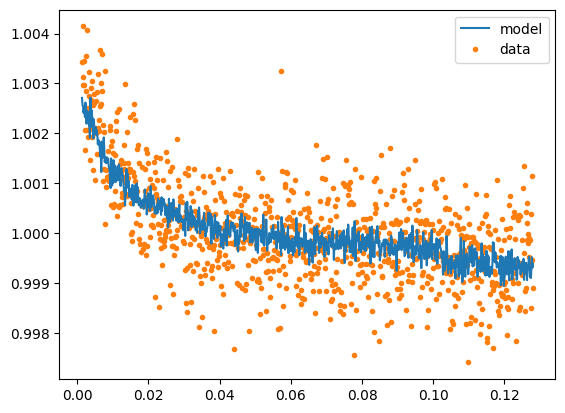

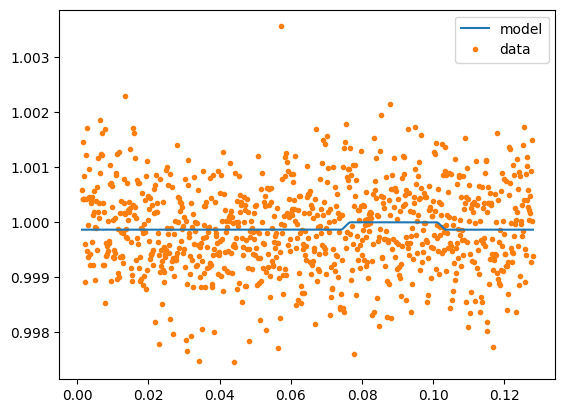

(-1.3+/-0.7)e+02


In [7]:
fit = erebus.individual_fits[0]
print(fit.order)

res = fit.results
res_nominal_values = [res[k].nominal_value for k in res][:-1]
physical_params = res_nominal_values[:9]
systematic_params = res_nominal_values[9:]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *res_nominal_values)
plt.plot(t, f_model, label='model', zorder=3)
plt.plot(t, f, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

f_systematic = fit.systematic_model(t, *systematic_params)
plt.plot(t, f_model / f_systematic, label='model', zorder=3)
plt.plot(t, f / f_systematic, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

print(res['fp']*1e6)